## Accleration from motion
Calcualtion of 2 DOF acceleration in some point based on 2 DOF motion in some other point

In [1]:
import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sympy as sp
import sympy.physics.mechanics as me
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from signal_lab.substitute_dynamic_symbols import substitute_dynamic_symbols, find_name, find_derivative_name, lambdify


In [3]:
x0,y0,z0 = me.dynamicsymbols('x0 y0 z0')
x01d,y01d,z01d = me.dynamicsymbols('x0 y0 z0',1)
x02d,y02d,z02d = me.dynamicsymbols('x0 y0 z0',2)

phi,theta,psi = me.dynamicsymbols('phi theta psi')
p,q,r = me.dynamicsymbols('phi theta psi',1)
p1d,q1d,r1d = me.dynamicsymbols('phi theta psi',2)


p_x = sp.Symbol('p_x')
p_y = sp.Symbol('p_y')
p_z = sp.Symbol('p_z')



In [4]:
x02d

Derivative(x0(t), (t, 2))

In [5]:
N = me.ReferenceFrame('N')

In [6]:
S = N.orientnew('S', 'Axis', [theta,N.y])

In [7]:
#S.set_ang_vel(N, q * N.y)
#S.set_ang_acc(N, q1d * N.y)

In [8]:
S.ang_vel_in(N)

theta'*N.y

In [9]:
S.ang_acc_in(N)

theta''*N.y

In [10]:
M = me.Point('M')  # Origo of measurement system
M.set_vel(N, 0)

O = M.locatenew('O', x0*N.x + z0*N.z) # Origo of ship
O.set_vel(N, x01d*N.x + z01d*N.z)
O.set_acc(N, x02d*N.x + z02d*N.z)



In [11]:
P = O.locatenew('P', p_x*S.x + p_z*S.z)
P.set_vel(S, 0)


In [12]:
S.dcm(N)

Matrix([
[cos(theta(t)), 0, -sin(theta(t))],
[            0, 1,              0],
[sin(theta(t)), 0,  cos(theta(t))]])

In [13]:
vector = P.pos_from(M)
motion_P = vector.express(N)
motion_P

(p_x*cos(theta) + p_z*sin(theta) + x0)*N.x + (-p_x*sin(theta) + p_z*cos(theta) + z0)*N.z

In [14]:
motion_matrix = vector.to_matrix(N)
motion_matrix

Matrix([
[ p_x*cos(theta(t)) + p_z*sin(theta(t)) + x0(t)],
[                                             0],
[-p_x*sin(theta(t)) + p_z*cos(theta(t)) + z0(t)]])

In [15]:
motion_lambda = lambdify(motion_matrix)

In [16]:
motion_lambda

<function _lambdifygenerated(z0, p_z, theta, x0, p_x)>

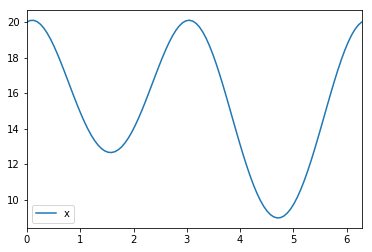

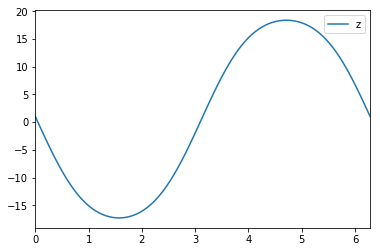

In [17]:
number_of_points = 100
t = np.linspace(0,2*np.pi,number_of_points)
df = pd.DataFrame(index = t)
df['theta'] = np.sin(t)
df['p_z'] = 1
df['p_x'] = 20
df['x0'] = np.sin(t)
df['z0'] = -np.sin(t)
motions = motion_lambda(**df)

df_result = df.copy()
df_result['x'] = motions[0][0]
df_result['y'] = motions[1][0]
df_result['z'] = motions[2][0]

fig,ax=plt.subplots()
df_result.plot(y='x', ax=ax)

fig,ax=plt.subplots()
df_result.plot(y='z', ax=ax)


## Velocity

In [18]:
P.v2pt_theory(O,N,S)

x0'*N.x + z0'*N.z + p_z*theta'*S.x - p_x*theta'*S.z

In [19]:
velocity_matrix = P.vel(N).express(N).to_matrix(N)
velocity_matrix

Matrix([
[-p_x*sin(theta(t))*Derivative(theta(t), t) + p_z*cos(theta(t))*Derivative(theta(t), t) + Derivative(x0(t), t)],
[                                                                                                            0],
[-p_x*cos(theta(t))*Derivative(theta(t), t) - p_z*sin(theta(t))*Derivative(theta(t), t) + Derivative(z0(t), t)]])

In [20]:
velocity_lambda = lambdify(velocity_matrix)

In [21]:
q.expr

theta(t)

In [22]:
q

Derivative(theta(t), t)

In [23]:
q1d.args[1][1]

2

In [24]:
velocity_lambda

<function _lambdifygenerated(theta, p_z, z01d, x01d, p_x, theta1d)>

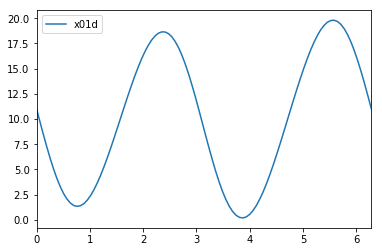

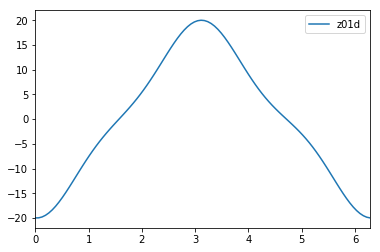

In [25]:
number_of_points = 100
t = np.linspace(0,2*np.pi,number_of_points)
df = pd.DataFrame(index = t)
df['theta'] = np.sin(t)
df['theta1d'] = np.cos(t)
df['p_z'] = 1
df['p_x'] = 20
df['x01d'] = 10
df['z01d'] = 0


velocities = velocity_lambda(**df)

df_result = df.copy()
df_result['x01d'] = velocities[0][0]
df_result['y01d'] = velocities[1][0]
df_result['z01d'] = velocities[2][0]

fig,ax=plt.subplots()
df_result.plot(y='x01d', ax=ax)

fig,ax=plt.subplots()
df_result.plot(y='z01d', ax=ax)

## Acceleration

In [26]:
P.a2pt_theory(O,N,S)

x0''*N.x + z0''*N.z + (-p_x*theta'**2 + p_z*theta'')*S.x + (-p_x*theta'' - p_z*theta'**2)*S.z

In [27]:
acceleration_matrix = P.acc(N).express(N).to_matrix(N)
acceleration_matrix

Matrix([
[ (-p_x*Derivative(theta(t), t)**2 + p_z*Derivative(theta(t), (t, 2)))*cos(theta(t)) + (-p_x*Derivative(theta(t), (t, 2)) - p_z*Derivative(theta(t), t)**2)*sin(theta(t)) + Derivative(x0(t), (t, 2))],
[                                                                                                                                                                                                   0],
[-(-p_x*Derivative(theta(t), t)**2 + p_z*Derivative(theta(t), (t, 2)))*sin(theta(t)) + (-p_x*Derivative(theta(t), (t, 2)) - p_z*Derivative(theta(t), t)**2)*cos(theta(t)) + Derivative(z0(t), (t, 2))]])

In [28]:
acceleration_lambda = lambdify(acceleration_matrix)

In [29]:
acceleration_lambda

<function _lambdifygenerated(theta2d, theta, p_z, x02d, z02d, p_x, theta1d)>

### Centrifugal acceleration
Absolute acceleration can be calcualted as: <br>
$ |a| = r\cdot\dot{\theta}^2 $

With the components: <br>
$ \ddot{x_0} = -a\cdot cos(\theta) $ <br>
$ \ddot{z_0} = a\cdot sin(\theta) $


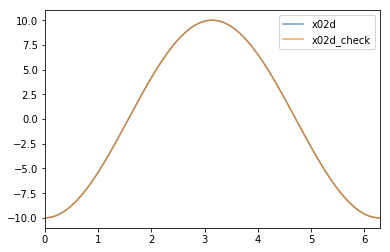

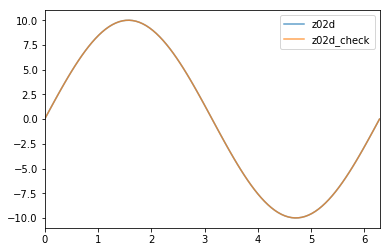

In [30]:
number_of_points = 100
t = np.linspace(0,2*np.pi,number_of_points)
r_ = 10
w_ = 1
df = pd.DataFrame(index = t)
df['theta'] = w_*t
df['theta1d'] = w_
df['theta2d'] = 0
df['p_z'] = 0
df['p_x'] = r_
df['x02d'] = 0
df['z02d'] = 0


accelerations = acceleration_lambda(**df)

df_result = df.copy()
df_result['x02d'] = accelerations[0][0]
df_result['y02d'] = accelerations[1][0]
df_result['z02d'] = accelerations[2][0]

a = r_* w_**2
df_result['x02d_check'] = -a*np.cos(df['theta'])
df_result['z02d_check'] = a*np.sin(df['theta'])

fig,ax=plt.subplots()
df_result.plot(y=['x02d','x02d_check'], ax=ax, alpha=0.7)

fig,ax=plt.subplots()
df_result.plot(y=['z02d','z02d_check'], ax=ax, alpha=0.7)

## Save lambdas

In [33]:
import dill
dill.settings['recurse'] = True

In [40]:
with open('test.dill',mode='wb') as file:
    dill.dump(acceleration_lambda, file=file)

In [38]:
#with open('test',mode='rb') as file:
#    s = dill.load(file)